<a href="https://colab.research.google.com/github/Arifulhaque-02128/ML_Projects/blob/main/medical_specialist_classification_using_bilstm_and_gloVe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattion/Specialist Classification.csv")

In [4]:
df.head()

,Patient ID,Gender,Problem,Specialist
0,NaN,NaN,NaN,NaN
1,1.0,মহিলা,আমার তিন দিন যাবত অনেক মাথা ব্যথা,Medicine
2,2.0,পুরুষ,আমার প্রায় এক সপ্তাহ ধরে রোদে গেলেই মাথা ধরে য...,Medicine
3,3.0,মহিলা,আমার বোনের কয়েকদিন ধরে চোখ আর মাথা ব্যথা,Medicine
4,4.0,মহিলা,আমার মায়ের কপালের দুই দিকে অনেক ব্যথা করে আর ন...,Medicine


In [5]:
df.isnull().sum()

Patient ID    1
Gender        1
Problem       1
Specialist    1
dtype: int64

In [6]:
new_df = df.dropna()

In [7]:
new_df.isnull().sum()

Patient ID    0
Gender        0
Problem       0
Specialist    0
dtype: int64

In [8]:
new_df.head()

,Patient ID,Gender,Problem,Specialist
1,1.0,মহিলা,আমার তিন দিন যাবত অনেক মাথা ব্যথা,Medicine
2,2.0,পুরুষ,আমার প্রায় এক সপ্তাহ ধরে রোদে গেলেই মাথা ধরে য...,Medicine
3,3.0,মহিলা,আমার বোনের কয়েকদিন ধরে চোখ আর মাথা ব্যথা,Medicine
4,4.0,মহিলা,আমার মায়ের কপালের দুই দিকে অনেক ব্যথা করে আর ন...,Medicine
5,5.0,পুরুষ,আমার অনেক মাথা ব্যথা করে,Medicine


In [9]:
new_df['Specialist'].value_counts()

Specialist
Medicine           278
Ophthalmologist     71
Gynecologist        59
Surgery             58
Orthopedic          48
Cardiologist        42
Skin                38
Dentist             37
ENT                 27
Name: count, dtype: int64

In [10]:
new_df['Gender'].value_counts()

Gender
মহিলা    370
পুরুষ    288
Name: count, dtype: int64

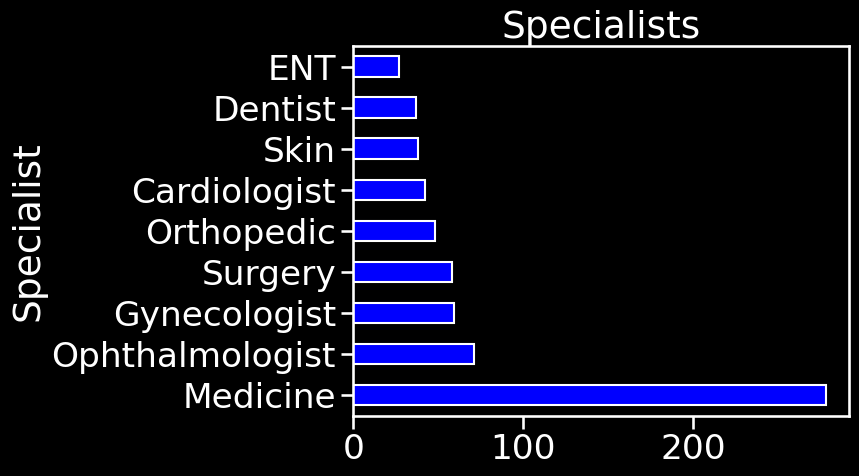

In [11]:
sns.set(style="ticks", context="talk", font_scale=1.5)
plt.style.use("dark_background")
new_df["Specialist"].value_counts().plot.barh(color='blue', title='Specialists',);

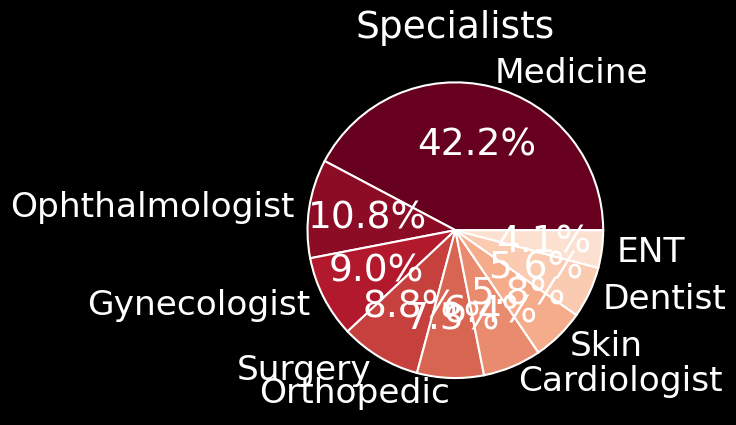

In [12]:
color = plt.cm.RdBu(np.linspace(0,1,20))
new_df["Specialist"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="Gender",colors=color,autopct="%0.1f%%")
plt.title("Specialists")
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Bengali natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2489 (\N{BENGALI LETTER HA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
/us

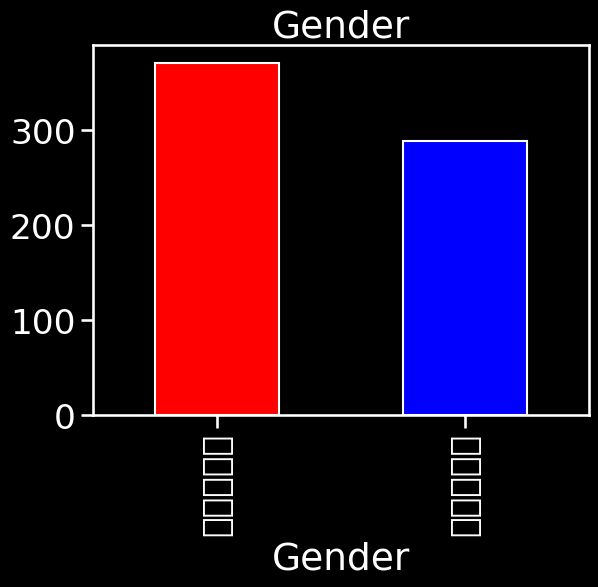

In [13]:
new_df["Gender"].value_counts().nlargest(4).plot.bar(color=['red','blue'], title='Gender');

In [14]:
den = new_df[(new_df['Specialist']=='Dentist')].reset_index(drop=True)
den.head()

,Patient ID,Gender,Problem,Specialist
0,20.0,পুরুষ,আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে ...,Dentist
1,21.0,পুরুষ,আমার দাঁত ভেঙ্গে যাচ্ছে,Dentist
2,22.0,মহিলা,আমার মাড়ি অনেক ব্যথা আর ব্রাশ করার সময় রক্ত পর...,Dentist
3,23.0,মহিলা,আমার দাঁতে কালো দাগ হচ্ছে কোনোভাবেই দাগ যাচ্ছে...,Dentist
4,24.0,পুরুষ,আমি দাঁতে জোর পাচ্ছি না।,Dentist


In [15]:
den["Gender"].value_counts()

Gender
পুরুষ    21
মহিলা    16
Name: count, dtype: int64

In [16]:
surg = new_df[(new_df['Specialist']=='Surgery')].reset_index(drop=True)
surg.head()

,Patient ID,Gender,Problem,Specialist
0,11.0,মহিলা,আমার মুখে অনেক বড় ফোঁড়ার মত উঠে আর লাল হয়ে থাক...,Surgery
1,96.0,মহিলা,আমার স্তনে প্রচন্ড ব্যথা করে। প্রায় এক মাস ধরে...,Surgery
2,97.0,মহিলা,আমার নিপল অনেক চুল্কায় এবং সাদা ময়লার মত বের হয়।,Surgery
3,98.0,মহিলা,নিপল অনেক ব্যথা করে আর ফুলে গিয়েছে আর চাপ দিলে...,Surgery
4,99.0,মহিলা,আমার নিপলে লাল গোটার মত বের হয়েছে এবং লাল হয়ে ...,Surgery


In [17]:
surg["Gender"].value_counts()

Gender
মহিলা    44
পুরুষ    14
Name: count, dtype: int64

In [18]:
ski = new_df[(new_df['Specialist']=='Skin')].reset_index(drop=True)
ski.head()

,Patient ID,Gender,Problem,Specialist
0,9.0,পুরুষ,আমার কপালে গোটার মত বের হয়েছে,Skin
1,10.0,পুরুষ,আমার অনেক ব্রণ হয় মুখে। আর অনেক ব্যথা করে।,Skin
2,12.0,পুরুষ,আমার মুখে গোটা উঠে মুখে কালো দাগ পরে যাচ্ছে।,Skin
3,13.0,মহিলা,আমার নাকে আর থুতনিতে সাদা বিচির মত উঠে আর মুখ ...,Skin
4,55.0,মহিলা,আমি ধুলায় গেলে আমার স্কিন অনেক চুল্কায় আর ফুলে...,Skin


In [19]:
ski["Gender"].value_counts()

Gender
মহিলা    23
পুরুষ    15
Name: count, dtype: int64

In [20]:
# data1 = pd.read_excel('/content/gdrive/MyDrive/NLP/Project/stopwords_bangla.xlsx')
data1 = pd.read_excel('/content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattion/stopwords_bangla.xlsx')
stopwords = data1['words'].tolist()

In [21]:
import re,nltk,json

In [22]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out



In [23]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stopwords]

    out=' '.join(stm)

    return str(out)

In [24]:
new_df['cleaned_problem'] = new_df['Problem'].apply(preprocessing)
new_df['cleaned_problem'] = new_df['cleaned_problem'].apply(stopwordRemoval)

# print some cleaned reviews from the dataset
sample_data = [20,50,100,200,300,350,400,450,500,600]
for i in sample_data:
  print('Original: ', new_df.Problem[i],'\nCleaned:',
           new_df.cleaned_problem[i],'\n','Category:-- ', new_df.Specialist[i],'\n')

Original:  আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে। 
Cleaned: দাঁত শিরশির ঠান্ডা গরম খেতে না অস্বস্তি লাগে 
 Category:--  Dentist 

Original:  আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে। 
Cleaned: মাথা ব্যথা চোখে প্রেসার পরছে 
 Category:--  Ophthalmologist 

Original:  আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না। 
Cleaned: স্তনের নিপল দুধের সাদা রস প্রেগন্যান্ট না 
 Category:--  Surgery 

Original:  আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না 
Cleaned: পায়ে পানি আসছে ঠিকমত হাঁটতে পারছি না 
 Category:--  Medicine 

Original:  আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে। 
Cleaned: মাথা ব্যথা চোখে প্রেসার পরছে 
 Category:--  Ophthalmologist 

Original:  আমার ছেলের রাতের বেলা জ্বর আসে। 
Cleaned: ছেলের রাতের বেলা জ্বর 
 Category:--  Medicine 

Original:  আমার পায়ের আঙ্গুল ফুলে আছে আর প্রচুর ব্যথা করছে। 
Cleaned: পায়ের আঙ্গুল ফুলে প্রচুর ব্যথা 
 Category

<ipython-input-24-03ea5795bc4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_problem'] = new_df['Problem'].apply(preprocessing)
<ipython-input-24-03ea5795bc4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_problem'] = new_df['cleaned_problem'].apply(stopwordRemoval)


In [25]:
def data_summary(dataset):

    """
    This function will print the summary of the problems and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(new_df.cleaned_problem) for word in t.strip().split()]
    class_label= [k for k,v in new_df.Specialist.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(new_df[new_df.Specialist==label].cleaned_problem) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(new_df[new_df.Specialist==label].cleaned_problem)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(new_df[new_df.Specialist==label].cleaned_problem))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(new_df)


Class Name :  Medicine
Number of Documents:278
Number of Words:1595
Number of Unique Words:399
Most Frequent Words:

ব্যথা	98
না	73
লাগে	45
মাথা	39
ঠিকমত	36
ঘুম	33
যায়	31
বমি	28
জ্বর	23
সাথে	21

Class Name :  Ophthalmologist
Number of Documents:71
Number of Words:376
Number of Unique Words:115
Most Frequent Words:

চোখ	36
না	20
ব্যথা	19
চোখে	16
পানি	11
ঠিকমত	11
দেখি	9
চোখের	9
ঝাপ্সা	7
চুল্কায়	7

Class Name :  Gynecologist
Number of Documents:59
Number of Words:389
Number of Unique Words:136
Most Frequent Words:

ব্যথা	25
পিরিয়ড	21
না	16
পিরিয়ডের	14
সাদা	13
সময়	12
পেট	11
মেয়ের	11
আম্মুর	9
স্তনে	8

Class Name :  Surgery
Number of Documents:58
Number of Words:336
Number of Unique Words:97
Most Frequent Words:

ব্যথা	27
ফুলে	16
আস্তে	12
বড়	11
স্তন	11
মেয়ের	11
পুঁজ	9
এগুলো	8
স্তনে	8
নিপল	8

Class Name :  Orthopedic
Number of Documents:48
Number of Words:307
Number of Unique Words:98
Most Frequent Words:

ব্যথা	42
না	25
হাত	10
পায়ের	9
মাজা	9
পারছে	9
হাঁটুতে	8
পায়ে	8
নাড়াতে	7
প্রচন্ড	7

Clas

<ipython-input-26-04e7bfc8576b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(class_names, rotation=45);


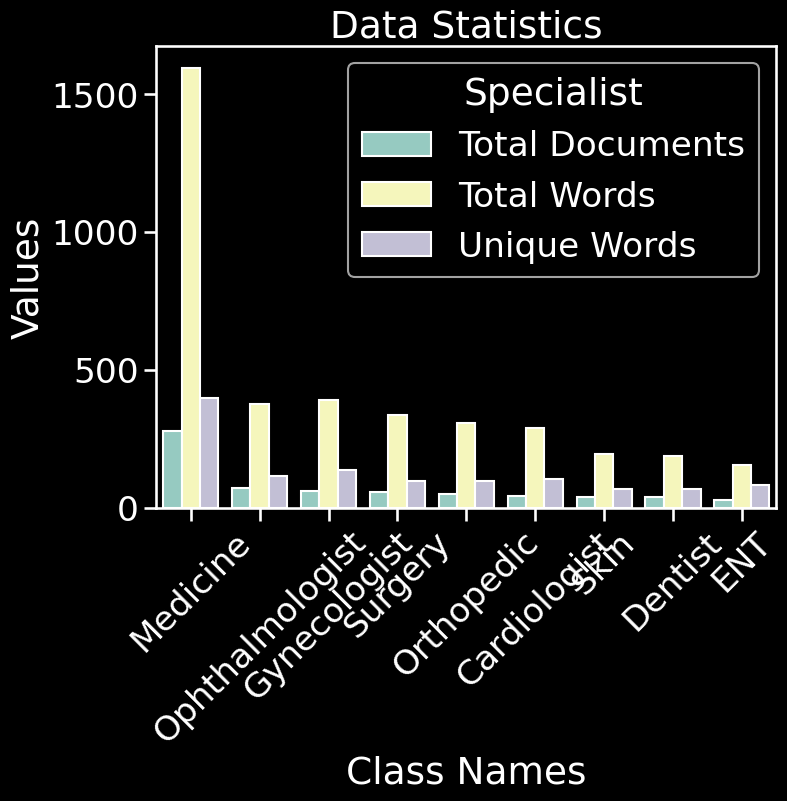

In [26]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Specialist", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Specialist')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

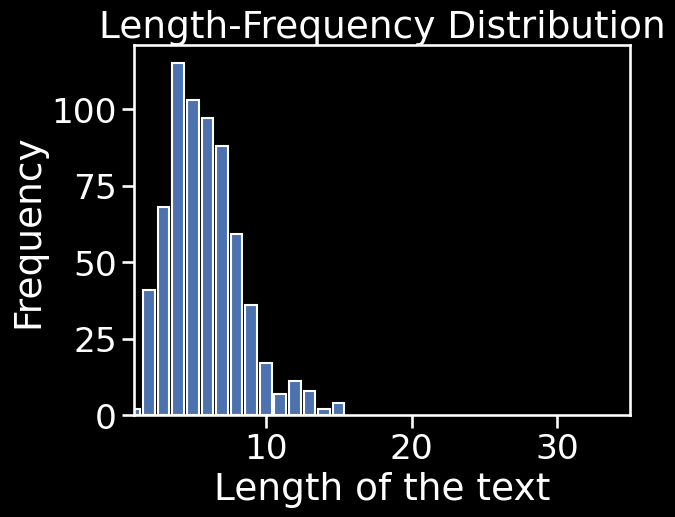

Maximum Length of a text: 15
Minimum Length of a text: 1
Average Length of a text: 6.0


In [27]:
# Calculate the Review of each of the Review
new_df['textLength'] = new_df.cleaned_problem.apply(lambda x:len(x.split()))
frequency = dict()
for i in new_df.textLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 35)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the text')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a text: {max(new_df.textLength)}")
print(f"Minimum Length of a text: {min(new_df.textLength)}")
print(f"Average Length of a text: {round(np.mean(new_df.textLength),0)}")

In [28]:
# segregating dataframe for analyzing individual problem
df_med = new_df[new_df['Specialist'] == 'Medicine']
df_ophtha = new_df[new_df['Specialist'] == 'Ophthalmologist']
df_gyne = new_df[new_df['Specialist'] == 'Gynecologist']
df_surg = new_df[new_df['Specialist'] == 'Surgery']

df_ortho = new_df[new_df['Specialist'] == 'Orthopedic']
df_cardio = new_df[new_df['Specialist'] == 'Cardiologist']
df_skin = new_df[new_df['Specialist'] == 'Skin']
df_dent = new_df[new_df['Specialist'] == 'Dentist']
df_ent = new_df[new_df['Specialist'] == 'ENT']

In [29]:
!pip install wordcloud
!pip install bnlp_toolkit
!pip install python-bidi
from bidi.algorithm import get_display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.4 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=ec96e538cfb83e1f04fc7602a9baeb9ad32e1b4854f312c4b85202e6a0d3e8fd
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.99
    Uninstalling sentencepiece-0.1.99:
      Successfully uninstalled sentencepiece-0.1.99
  Attempting 

Text(0.5, 1.0, 'Word cloud for Medicine')

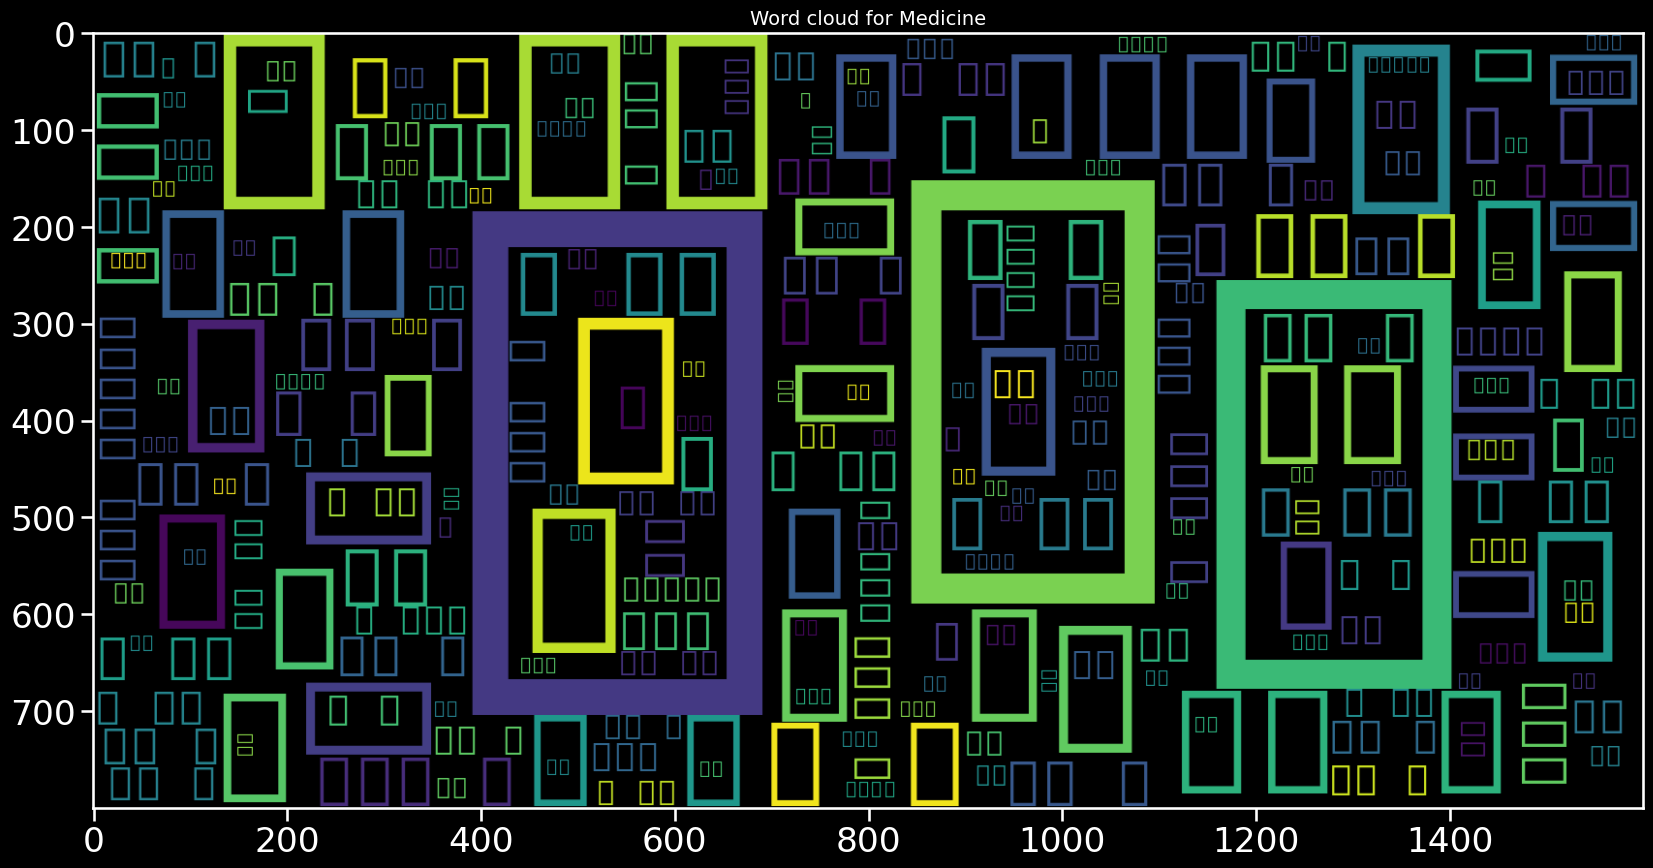

In [30]:
from wordcloud import WordCloud


plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(' '.join(df_med.cleaned_problem))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word cloud for Medicine', fontsize = 14)

In [31]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [100]:
def label_encoding(specialist,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        specialist: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(specialist)
    encoded_labels = le.transform(specialist)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->", le.classes_)
        # print("\n\t\t\t===== Labels =====",labels)
        # for i in sample_data:
        #     print(specialist[i],' ', encoded_labels[i],'\n')

    return labels, le

In [105]:
def dataset_split(feature,specialist):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature:
        specialist: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X,X_test,y,y_test = train_test_split(feature,specialist,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)


    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(feature),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [106]:
labels, label_encoder = label_encoding(new_df.Specialist, False)

In [107]:
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(new_df.cleaned_problem, labels)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 658 
	Training		 420 
	Test			 132 
	Validation		 106


In [108]:
#Tokenization
embedding_dim = 64
max_length = 15
trunc_type='post'
padding_type='post'
oov_tok = ""

def padded_problems(original,encoded,padded):
  '''
  print the samples padded problems
  '''
  print("\n\t\t\t====== Encoded Sequences ======","\n")
  print(original,"\n",encoded)
  print("\n\t\t\t====== Paded Sequences ======\n",original,"\n",padded)


In [109]:
word2vec = {}
with open('/content/gdrive/MyDrive/Bangla_News_Article_Dataset/bn_glove.39M.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec

In [110]:
#prepare a tokenizer for problem statement on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(X_train))
x_word2idx = x_tokenizer.word_index

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(X_train)
x_test    =   x_tokenizer.texts_to_sequences(X_test)
x_val   =   x_tokenizer.texts_to_sequences(X_valid)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_length, padding='post')
x_test    =   pad_sequences(x_test,  maxlen=max_length, padding='post')
x_val   =   pad_sequences(x_val, maxlen=max_length, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) + 1

In [111]:
embedding_dim = len(next(iter(word2vec.values())))

In [112]:
# create embedding matrix for x

x_embedding_matrix = np.zeros((x_voc_size, embedding_dim))
for word, i in x_word2idx.items():
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
        x_embedding_matrix[i] = embedding_vector

In [113]:
train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

In [116]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [117]:
# dataset path
path = '/content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattion'


In [140]:
keras.backend.clear_session()
accuracy_threshold = 0.8

# Prepare the tokenizer and the embedding matrix
embedding_dim = len(next(iter(word2vec.values())))
x_voc_size = len(x_tokenizer.word_index) + 1

max_length = 15
num_category = 9

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"Model.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint]

# Model definition
model = Sequential([
    Embedding(input_dim=x_voc_size, output_dim=embedding_dim, weights=[x_embedding_matrix], input_length=max_length, trainable=False),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
    Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(num_category, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 300)           161400    
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           186880    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 5

In [141]:
num_epochs = 50
batch = 64
history = model.fit(x_tr, train_label_seq,
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(x_val, valid_label_seq),
                    verbose=1,
                    callbacks = callback_list)


Epoch 1/50
7/7 [==============================] - ETA: 0s - loss: 2.1193 - accuracy: 0.3000
Epoch 1: val_accuracy improved from -inf to 0.44340, saving model to /content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattionModel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 19s 425ms/step - loss: 2.1193 - accuracy: 0.3000 - val_loss: 1.9463 - val_accuracy: 0.4434
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 1.9405 - accuracy: 0.4095
Epoch 2: val_accuracy did not improve from 0.44340
7/7 [==============================] - 1s 141ms/step - loss: 1.9405 - accuracy: 0.4095 - val_loss: 1.7887 - val_accuracy: 0.4434
Epoch 3/50
7/7 [==============================] - ETA: 0s - loss: 1.8637 - accuracy: 0.4119
Epoch 3: val_accuracy did not improve from 0.44340
7/7 [==============================] - 1s 136ms/step - loss: 1.8637 - accuracy: 0.4119 - val_loss: 1.7094 - val_accuracy: 0.4434
Epoch 4/50
7/7 [==============================] - ETA: 0s - loss: 1.7491 - accuracy: 0.4214
Epoch 4: val_accuracy improved from 0.44340 to 0.47170, saving model to /content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattionModel.h5
7/7 [==============================] - 1s 156ms/step - loss: 1.7491 - accur

5/5 [==============================] - 1s 15ms/step


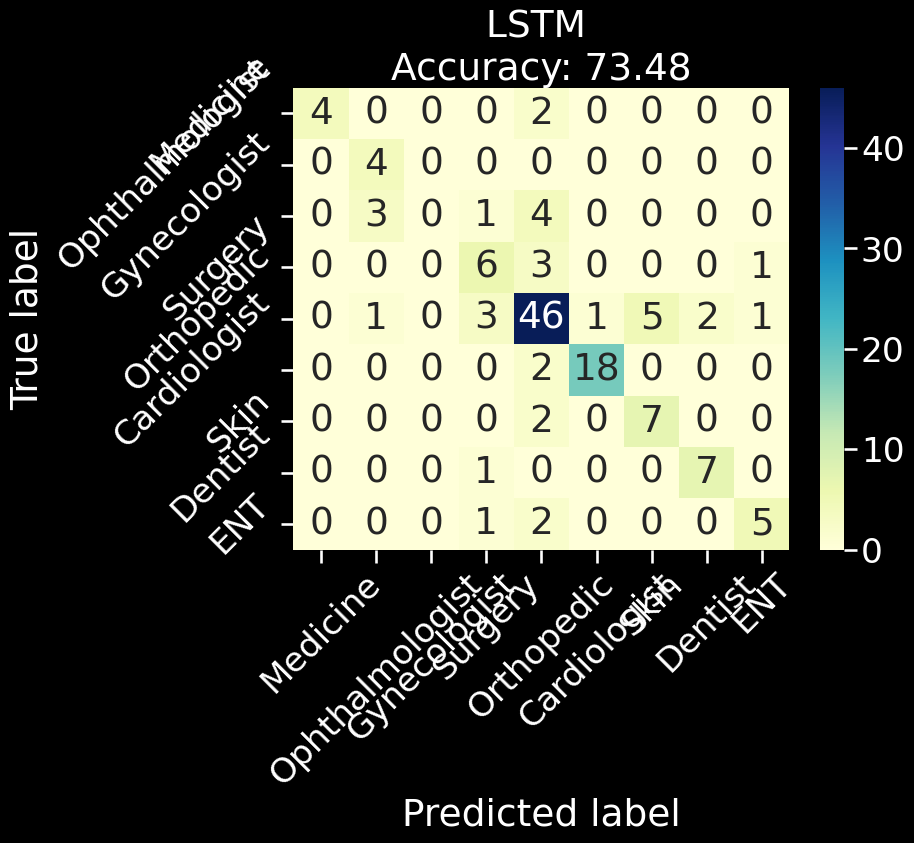

In [142]:
from sklearn.metrics import classification_report, confusion_matrix
# load the Saved model from directory
model = load_model(path+"Model.h5")
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(testing_label_seq, y_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Medicine' ,'Ophthalmologist' ,'Gynecologist', 'Surgery', 'Orthopedic', 'Cardiologist', 'Skin', 'Dentist', 'ENT'],
                     columns = ['Medicine' ,'Ophthalmologist' ,'Gynecologist', 'Surgery', 'Orthopedic', 'Cardiologist', 'Skin', 'Dentist', 'ENT'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
plt.title('LSTM \nAccuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [143]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = y_pred, output_dict=True)).transpose()
report = report.rename(index={'0': 'Medicine','1':'Ophthalmologist','2':'Gynecologist','3':'Surgery','4':'Orthopedic','5':'Cardiologist', '6':'Skin','7':'Dentist','8':'ENT'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
Medicine,100.00,66.67,80.00,6.000000
Ophthalmologist,50.00,100.00,66.67,4.000000
Gynecologist,0.00,0.00,0.00,8.000000
Surgery,50.00,60.00,54.55,10.000000
Orthopedic,75.41,77.97,76.67,59.000000
Cardiologist,94.74,90.00,92.31,20.000000
Skin,58.33,77.78,66.67,9.000000
Dentist,77.78,87.50,82.35,8.000000
ENT,71.43,62.50,66.67,8.000000
accuracy,73.48,73.48,73.48,0.734848


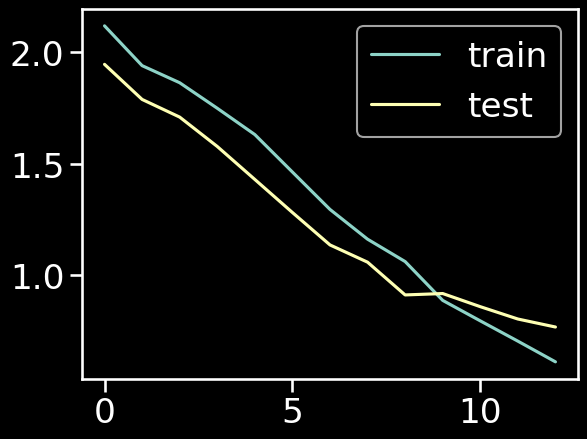

In [144]:
#Visualizing Loss
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [145]:
# manual prediction
sample_text = ["আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে।", "আমার নাতনির ঠিকমত পিরিয়ড হচ্ছে না। আর অনেক সাদা স্রাব বের হয়", "আমার দূরের জিনিস দেখতে অনেক কষ্ট হয় আর তখন মাথা ব্যথা করে", "আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না", "আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না।", "আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে।"]
sample_output = ['Dentist', 'Gynecologist', 'Ophthalmologist', 'Medicine', 'Surgery', 'Ophthalmologist' ]

# Define the class names mapping
class_names = {0: 'Medicine', 1:'Ophthalmologist', 2:'Gynecologist', 3:'Surgery', 4:'Orthopedic', 5:'Cardiologist', 6:'Skin', 7:'Dentist', 8:'ENT'}

for i, text in enumerate(sample_text) :
  cleaned_sample_txt = preprocessing(text)
  cleaned_txt = stopwordRemoval(cleaned_sample_txt)


  sample_sequences   =   x_tokenizer.texts_to_sequences([cleaned_txt])
  sample_padded    =   pad_sequences(sample_sequences,  maxlen=max_length, padding='post')


# Predict the class
  predicted_class_probabilities = model.predict(sample_padded)
  predicted_class_index = np.argmax(predicted_class_probabilities, axis=1)[0]

  # Map the predicted class index to the class name
  predicted_class_name = class_names[predicted_class_index]
  print(f"Problem :  '{text}' \nPredicted Class : '{predicted_class_name}'\nActual Class : '{sample_output[i]}'\n")

1/1 [==============================] - 0s 29ms/step
Problem :  'আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে।' 
Predicted Class : 'Ophthalmologist'
Actual Class : 'Dentist'

1/1 [==============================] - 0s 28ms/step
Problem :  'আমার নাতনির ঠিকমত পিরিয়ড হচ্ছে না। আর অনেক সাদা স্রাব বের হয়' 
Predicted Class : 'Surgery'
Actual Class : 'Gynecologist'

1/1 [==============================] - 0s 26ms/step
Problem :  'আমার দূরের জিনিস দেখতে অনেক কষ্ট হয় আর তখন মাথা ব্যথা করে' 
Predicted Class : 'Orthopedic'
Actual Class : 'Ophthalmologist'

1/1 [==============================] - 0s 32ms/step
Problem :  'আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না' 
Predicted Class : 'Orthopedic'
Actual Class : 'Medicine'

1/1 [==============================] - 0s 51ms/step
Problem :  'আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না।' 
Predicted Class : 'Surgery'
Actual Class : 'Surgery'

1/1 [==============================] - 0s 83ms/step
Pr